In [7]:
봄 <- c(3,4,5)
여름 <- c(6,7,8)
가을 <- c(9,10,11)
겨울 <- c(1,2,12)

seoul <- read.csv("../Data/newSeoul2019.csv")


        
    
   
seoul$계절 <- ifelse(seoul$월 %in% 봄,'봄',
                   ifelse(seoul$월 %in% 여름,'여름',
                          ifelse(seoul$월 %in% 가을,'가을','겨울'
                  )))
        seoul

년도,월,자치구명,발생건수,사망자수,부상자수,계절
2011,1,종로구,115,2,165,겨울
2011,2,종로구,99,0,134,겨울
2011,3,종로구,116,0,162,봄
2011,4,종로구,110,1,153,봄
2011,5,종로구,122,0,157,봄
2011,6,종로구,116,3,163,여름
2011,7,종로구,103,1,154,여름
2011,8,종로구,122,1,171,여름
2011,9,종로구,121,2,166,가을
2011,10,종로구,135,2,193,가을


In [8]:
regionAcc.mean <- aggregate(발생건수 ~ 계절, seoul, mean)
regionAcc.mean

계절,발생건수
가을,140.5896
겨울,120.7467
봄,135.3763
여름,136.4622


In [9]:
regionAcc.sd <- aggregate(발생건수 ~ 계절, seoul, sd)
head(regionAcc.sd)

계절,발생건수
가을,54.16799
겨울,50.68088
봄,51.17901
여름,53.56540


In [10]:
regionAcc.cv <- regionAcc.sd$발생건수/regionAcc.mean$발생건수
regionAcc <- data.frame(계절=regionAcc.sd$계절,변동계수=regionAcc.cv)
regionAcc$계절 <- factor(regionAcc$계절, levels=c("봄","여름","가을","겨울"))
regionAcc <- arrange(regionAcc,계절)
regionAcc

ERROR: Error in arrange(regionAcc, 계절): 함수 "arrange"를 찾을 수 없습니다


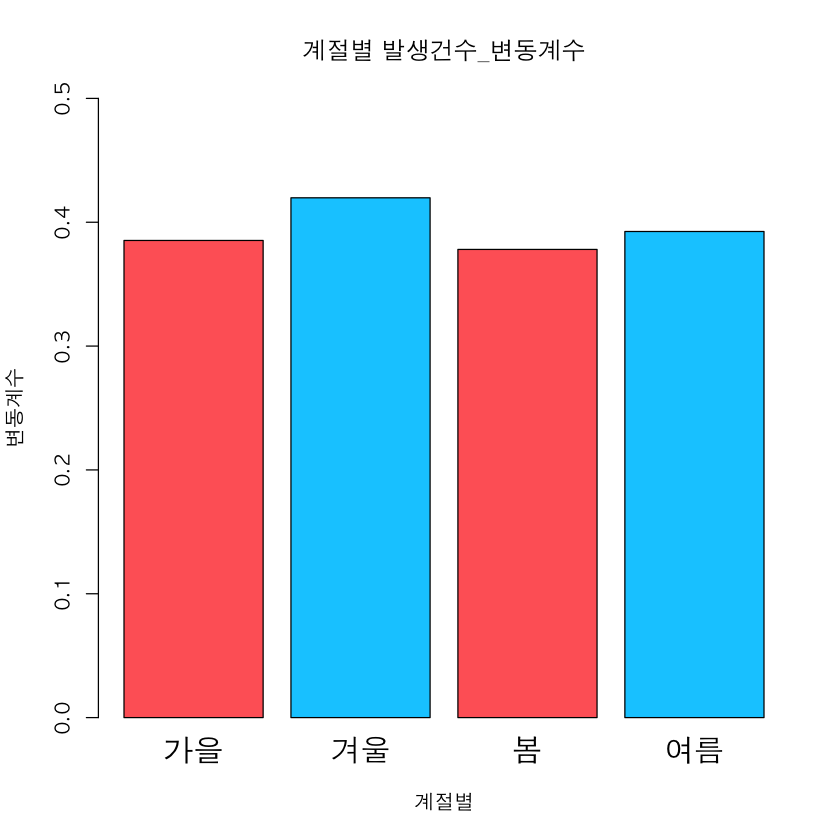

In [11]:
options(scipen = 100)
options(warn = -1)
par(family="AppleGothic")
barplot(regionAcc$변동계수,
       main = "계절별 발생건수_변동계수",
        xlab = "계절별",
        ylab = "변동계수",
       names = regionAcc$계절,
        cex.names=1.5,
        col = c('#FF6666','#00CCFF'),
       ylim=c(0,0.5)
       )

In [12]:
regionInjure.mean <- aggregate(부상자수 ~ 계절, seoul, mean)
regionInjure.sd <- aggregate(부상자수 ~ 계절, seoul, sd)
regionInjure.cv <- regionInjure.sd$부상자수 / regionInjure.mean$부상자수
regionInjure <- data.frame(계절=regionInjure.sd$계절, 변동계수=regionInjure.cv)
regionInjure$계절 <- factor(regionInjure$계절, levels=c("봄","여름","가을","겨울"))
regionInjure <- arrange(regionInjure,계절)
head(regionInjure)

regionInjure

ERROR: Error in arrange(regionInjure, 계절): 함수 "arrange"를 찾을 수 없습니다


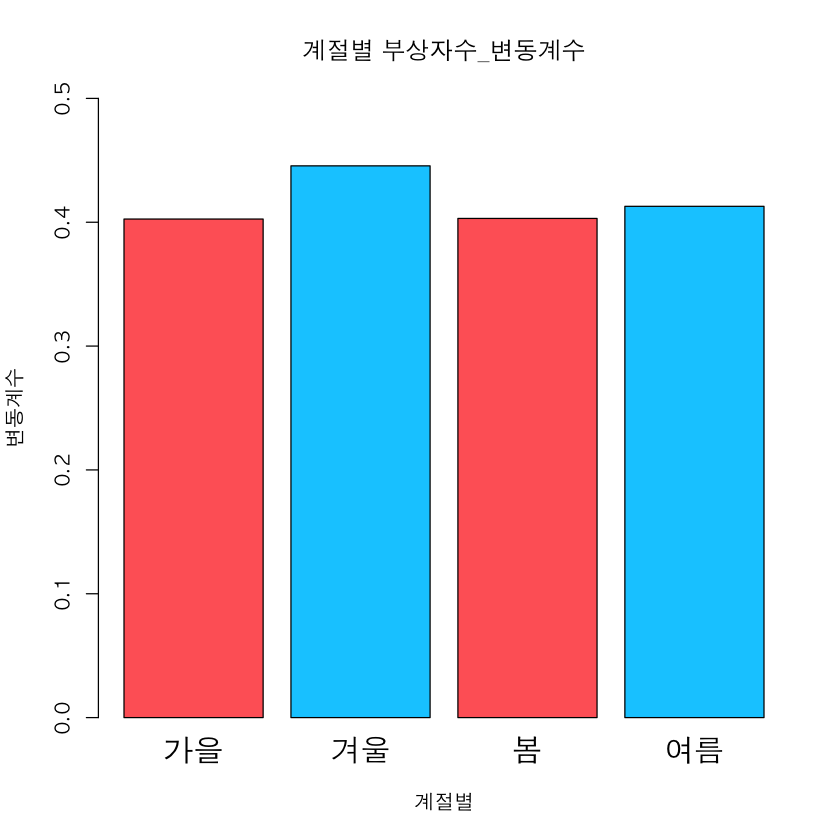

In [13]:
options(scipen = 100)
options(warn = -1)
par(family="AppleGothic")
barplot(regionInjure$변동계수,
       main = "계절별 부상자수_변동계수",
        xlab = "계절별",
        ylab = "변동계수",
       names = regionInjure$계절,
        cex.names=1.5,
        col = c('#FF6666','#00CCFF'),
       ylim=c(0,0.5)
       )

In [5]:
summary(regionAcc)


   계절      변동계수     
 봄  :1   Min.   :0.3780  
 여름:1   1st Qu.:0.3835  
 가을:1   Median :0.3889  
 겨울:1   Mean   :0.3939  
          3rd Qu.:0.3993  
          Max.   :0.4197  

In [ ]:
summary(regionInjure)